#  Applying Linear regresion on non-linear data

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [471]:
df = pd.read_csv("Ice_cream selling data.csv")

In [477]:
X = df.iloc[:, 0:1].values
y = df.iloc[:, -1].values

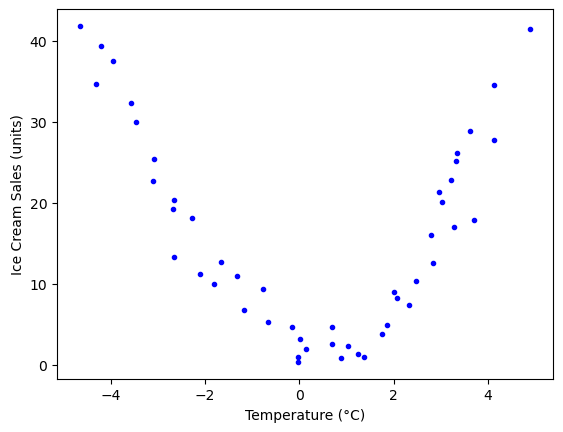

In [479]:
plt.plot(X, y, 'b.')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.show()

In [481]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [483]:
lr= LinearRegression()

In [485]:
lr.fit(X, y)

LinearRegression()

In [487]:
y_pred = lr.predict(X_test)

In [489]:
r2_score(y_test, y_pred)

-0.08178322039528951

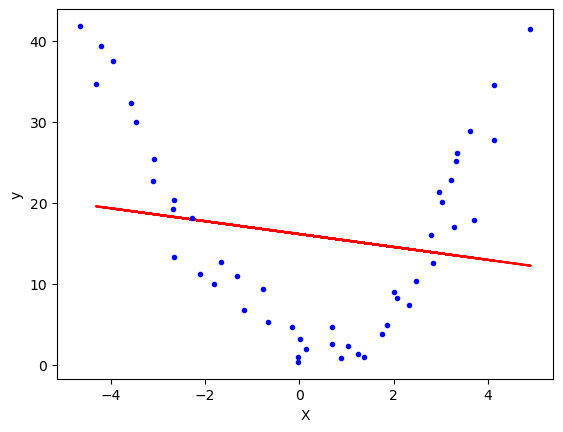

In [491]:
plt.plot(X_train, lr.predict(X_train), color ='red')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Applying Polynomial Linear Regression

In [493]:
# tranformation of feature
poly = PolynomialFeatures(degree=2, include_bias= True)
# if we use include_bias parameter = False , so x^0 will not come
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [495]:
print(X_train[0])
print(X_train_trans[0])

[-4.21398476]
[ 1.         -4.21398476 17.7576676 ]


In [497]:
# include_bias parameter

In [499]:
lr.fit(X_train_trans, y_train)

LinearRegression()

In [505]:
y_pred = lr.predict(X_test_trans)

In [507]:
r2_score(y_test, y_pred)

0.9194674262782351

In [362]:
# r2_score improve

In [509]:
print(lr.coef_)
print(lr.intercept_)

[ 0.         -0.96115771  1.86322401]
2.7362265943007316


In [511]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

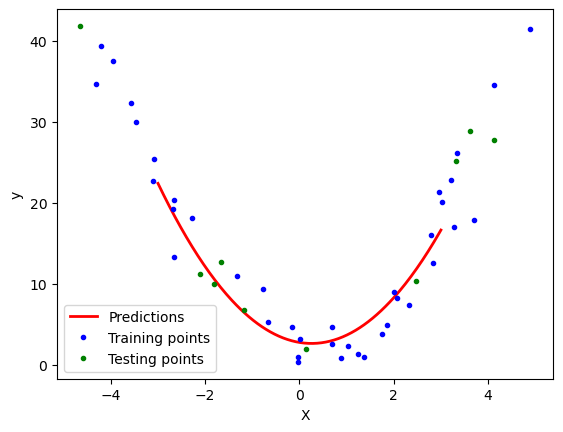

In [513]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Polynomial Multiple Linear Regression

In [516]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

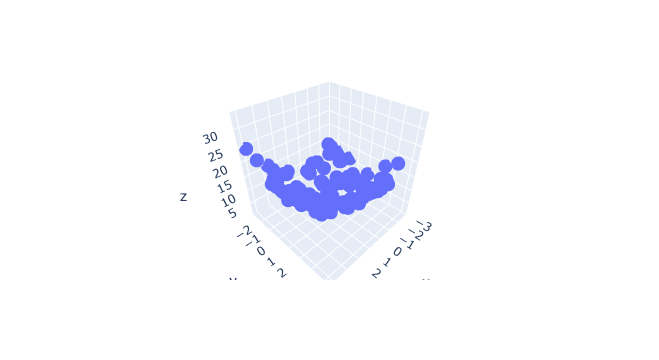

In [519]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [541]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

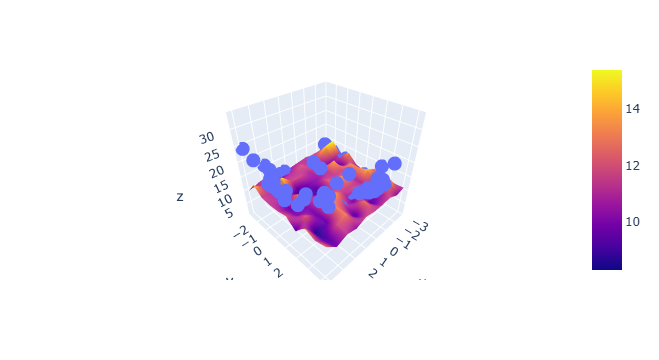

In [559]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [521]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [543]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [545]:
X_multi_trans.shape

(100, 6)

In [547]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [553]:
X_test_multi = poly.transform(final)

In [555]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

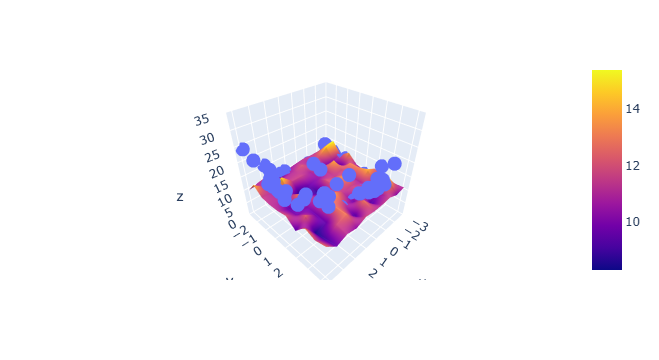

In [561]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()